In [ ]:
import pandas as pd #data Processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualization 
import seaborn as sb #visualoization
from termcolor import colored as cl #text customization 

from sklearn.model_selection import train_test_split #data split
from sklearn.linear_model import LinearRegression #OLS algorithm 
from sklearn.linear_model import Ridge # Ridge algorithm 
from sklearn.linear_model import Lasso # Lasso algo
from sklearn.linear_model import BayesianRidge #Bayesian algo
from sklearn.linear_model import ElasticNet #ElasticNet algo

from sklearn.metrics import explained_variance_score as evs #EVALUATION MATRIC
from sklearn.metrics import r2_score as r2 #EVALUATION METRIC

sb.set_style('whitegrid') #plot style
plt.rcParams['figure.figsize'] = (20,20) #plot size

In [125]:
df = pd.read_csv('Full Data.csv') #yearly data used in this. 



In [126]:
df.head()


,Date,GDP per capita,"Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate",Unemployment Rate,Fed Funds Rate,"Percent change of total consumer credit, seasonally adjusted at an annual rate",Inflation Rate,Home Price Index,Residential Loan Delinquency Rates
0,1990,23848.0,NaN,5.4,8.096521,1.705833,5.4,76.935750,NaN
1,1991,24303.0,NaN,6.4,5.685014,-1.267500,4.2,75.922583,3.2
2,1992,25393.0,NaN,7.3,3.521066,1.010000,3.0,76.330167,2.9
3,1993,26364.0,2492435.0,7.3,3.021342,7.152500,3.0,77.415750,2.6
4,1994,27674.0,2890546.0,6.6,4.206329,14.244167,2.6,79.470500,2.2


In [128]:
#removing the rows with null values 
df.drop([0], axis=0, inplace = True)
df.drop([1], axis=0, inplace = True)
df.drop([2], axis=0, inplace = True)

KeyError: '[0] not found in axis'

In [129]:
df.head()

,Date,GDP per capita,"Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate",Unemployment Rate,Fed Funds Rate,"Percent change of total consumer credit, seasonally adjusted at an annual rate",Inflation Rate,Home Price Index,Residential Loan Delinquency Rates
3,1993,26364.0,2492435.0,7.3,3.021342,7.152500,3.0,77.415750,2.60
4,1994,27674.0,2890546.0,6.6,4.206329,14.244167,2.6,79.470500,2.20
5,1995,28671.0,2743896.0,5.6,5.834301,13.520000,2.8,80.994583,2.12
6,1996,29947.0,3077012.0,5.6,5.300464,9.460000,3.0,82.810750,2.24
7,1997,31440.0,3173909.0,5.3,5.461507,5.549167,2.3,85.318417,2.26


In [130]:
#removing the null values 
df.dropna(inplace =True)

print(cl(df.isnull().sum(),attrs=['bold']))

Date                                                                                                                                                        0
GDP per capita                                                                                                                                              0
Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate    0
Unemployment Rate                                                                                                                                           0
Fed Funds Rate                                                                                                                                              0
Percent change of total consumer credit, seasonally adjusted at an annual rate                                                                              0
Inflation Rate                                      

In [131]:
#stastical view of the data 
df.describe()

,Date,GDP per capita,"Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate",Unemployment Rate,Fed Funds Rate,"Percent change of total consumer credit, seasonally adjusted at an annual rate",Inflation Rate,Home Price Index,Residential Loan Delinquency Rates
count,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2006.500000,45139.678571,4.658193e+06,5.735714,2.509389,5.785030,2.214286,142.414940,4.118929
std,8.225975,11842.885794,1.592093e+06,1.641637,2.188615,3.786936,0.969045,43.386677,3.104598
min,1993.000000,26364.000000,2.492435e+06,3.500000,0.088493,-3.628333,-0.400000,77.415750,1.500000
25%,1999.750000,35862.250000,3.149685e+06,4.600000,0.316048,4.615625,1.600000,102.668479,2.112500
50%,2006.500000,46611.000000,4.340982e+06,5.450000,1.856888,5.582083,2.300000,146.607083,2.550000
75%,2013.250000,53544.000000,6.004117e+06,6.600000,4.967158,7.077500,2.850000,174.133854,5.100000
max,2020.000000,66900.000000,7.478987e+06,9.800000,6.237432,14.244167,3.800000,222.169417,11.100000


In [132]:
print(cl(df.dtypes, attrs =['bold']))

Date                                                                                                                                                          int64
GDP per capita                                                                                                                                              float64
Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate    float64
Unemployment Rate                                                                                                                                           float64
Fed Funds Rate                                                                                                                                              float64
Percent change of total consumer credit, seasonally adjusted at an annual rate                                                                              float64
Inflation Rate  

In [133]:
print(df['GDP per capita '].head())

3    26364.0
4    27674.0
5    28671.0
6    29947.0
7    31440.0
Name: GDP per capita , dtype: float64


In [112]:
print(df['Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate'].head())

3    24,92,435
4    28,90,546
5    27,43,896
6    30,77,012
7    31,73,909
Name: Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate, dtype: object


In [83]:
df['Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate'] = df['Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate'].astype(np.int64)

In [135]:
df['GDP per capita ']=df['GDP per capita '].astype(np.int64)

Visualization

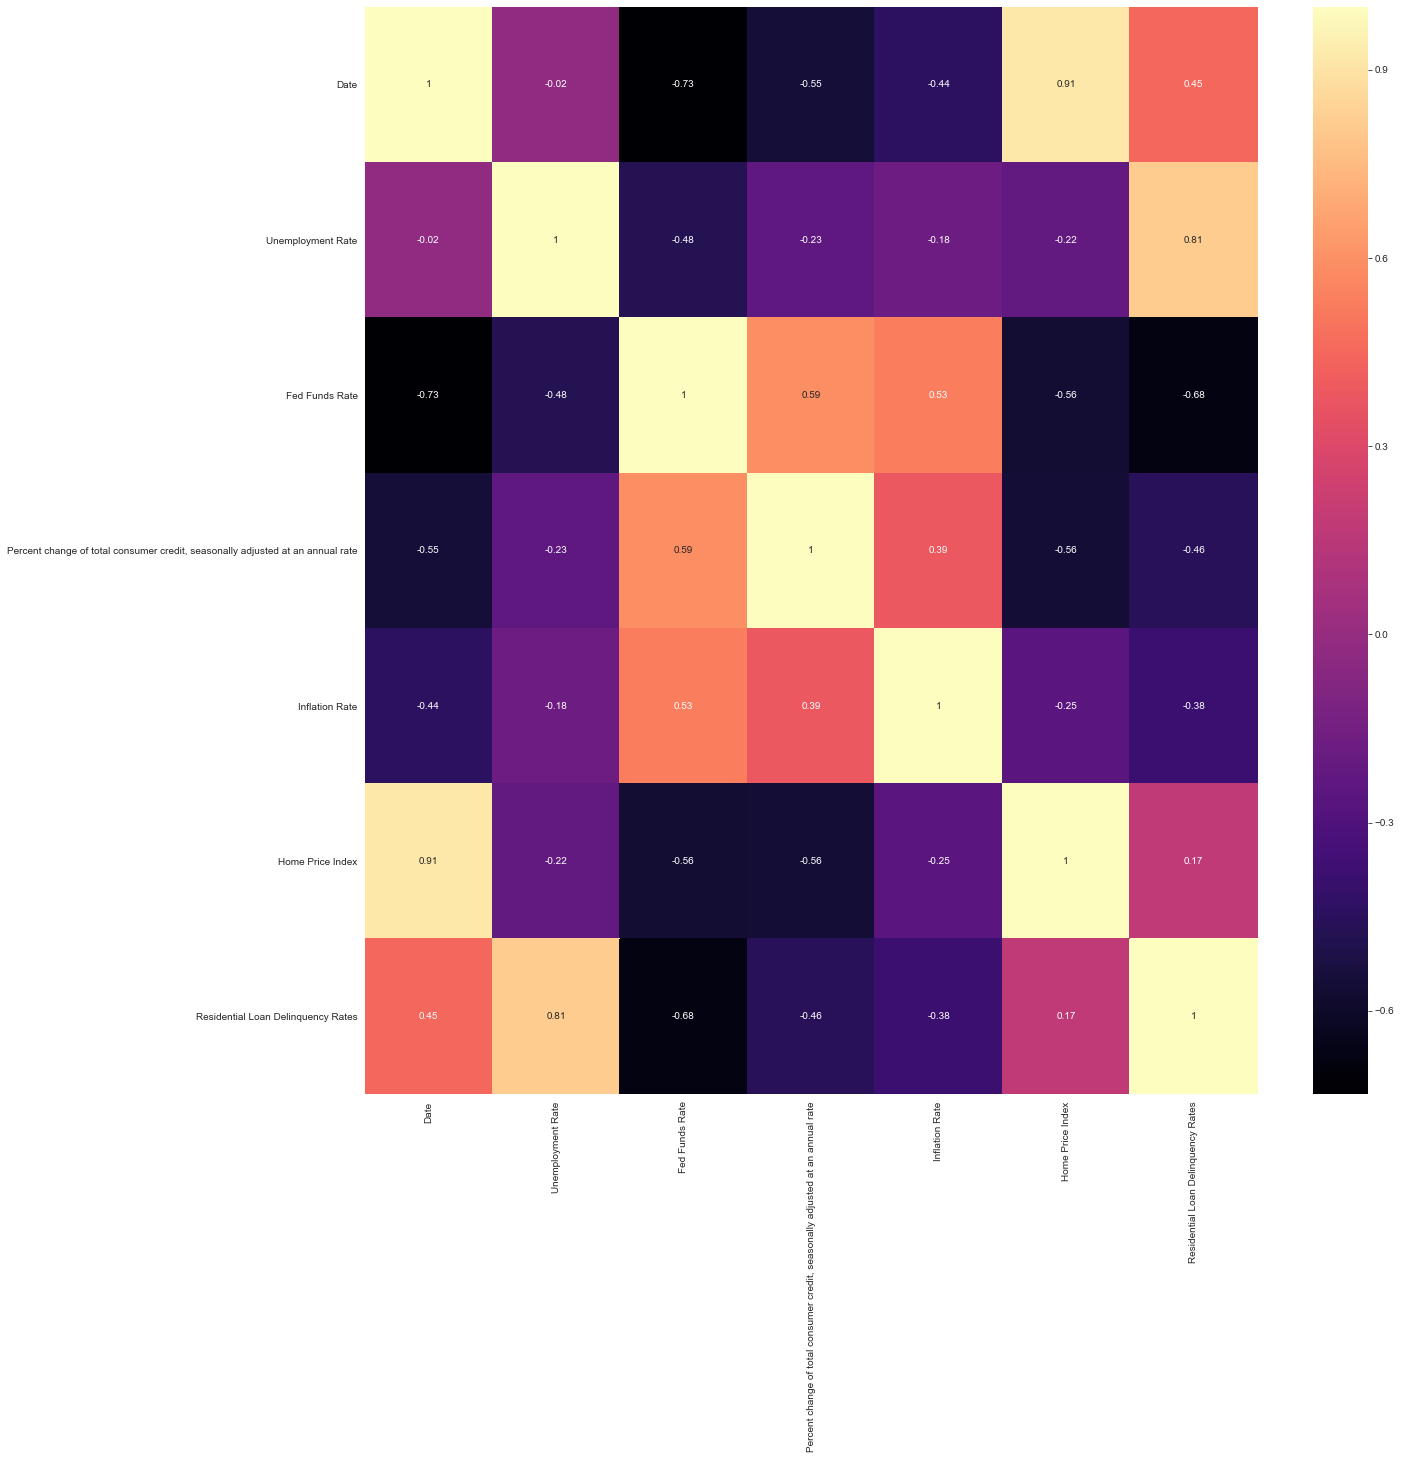

In [113]:
# 1. Heatmap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

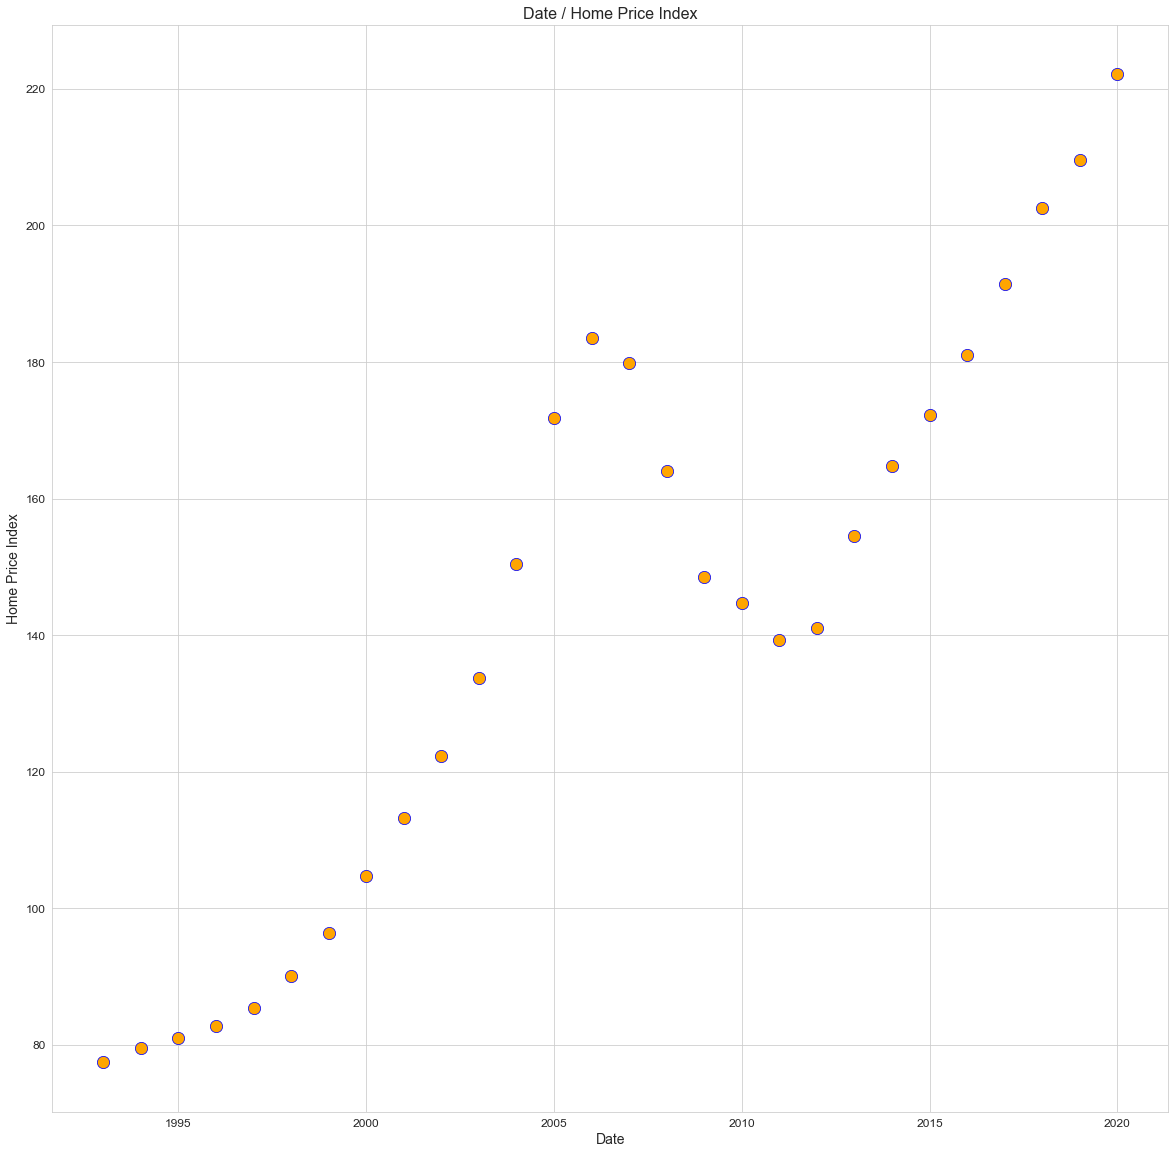

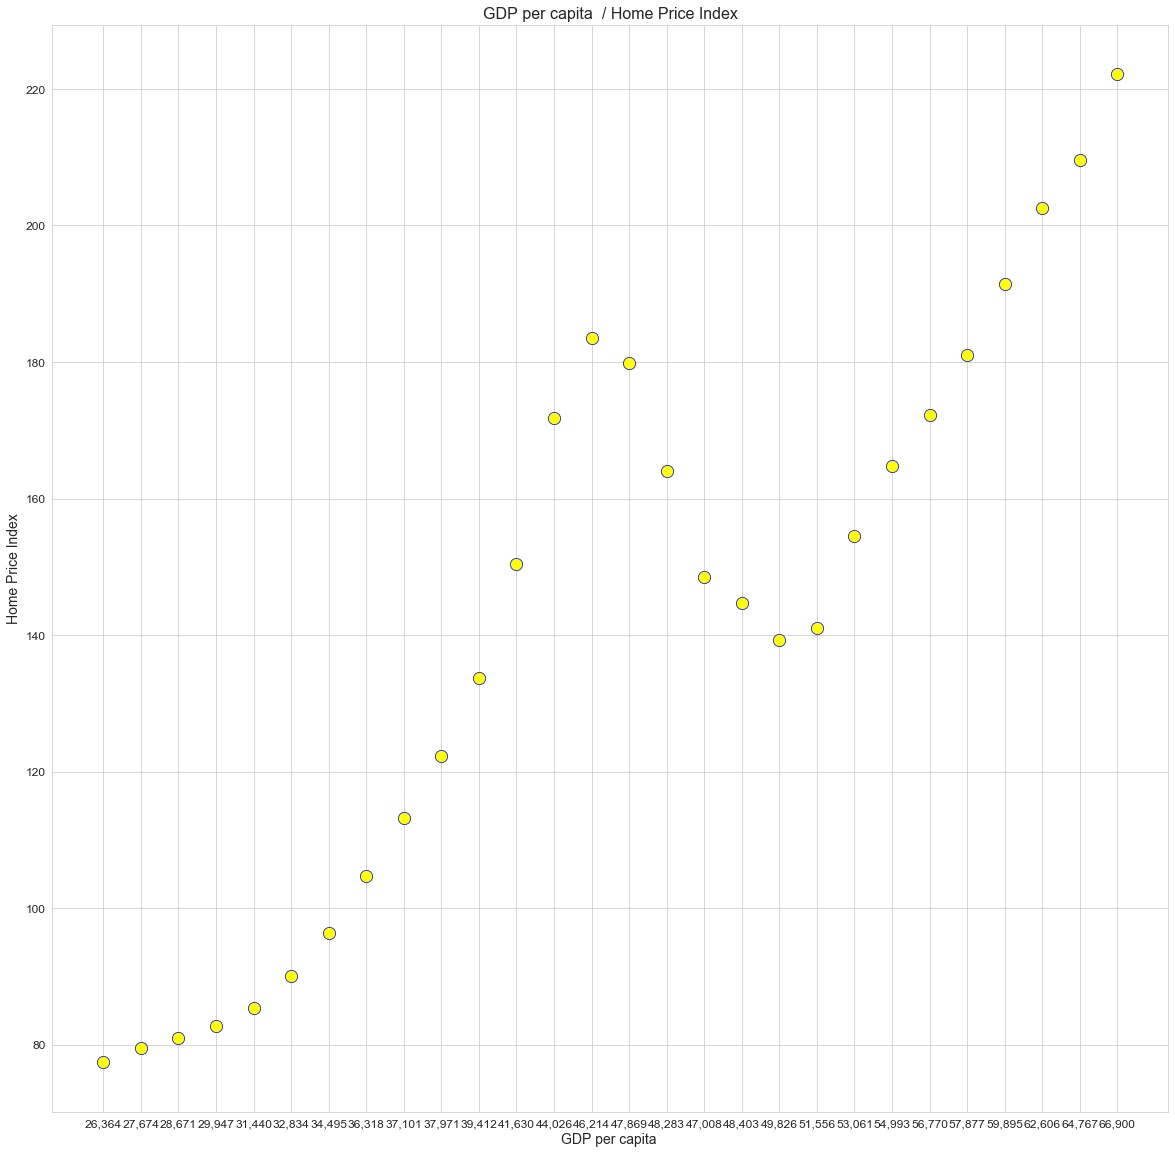

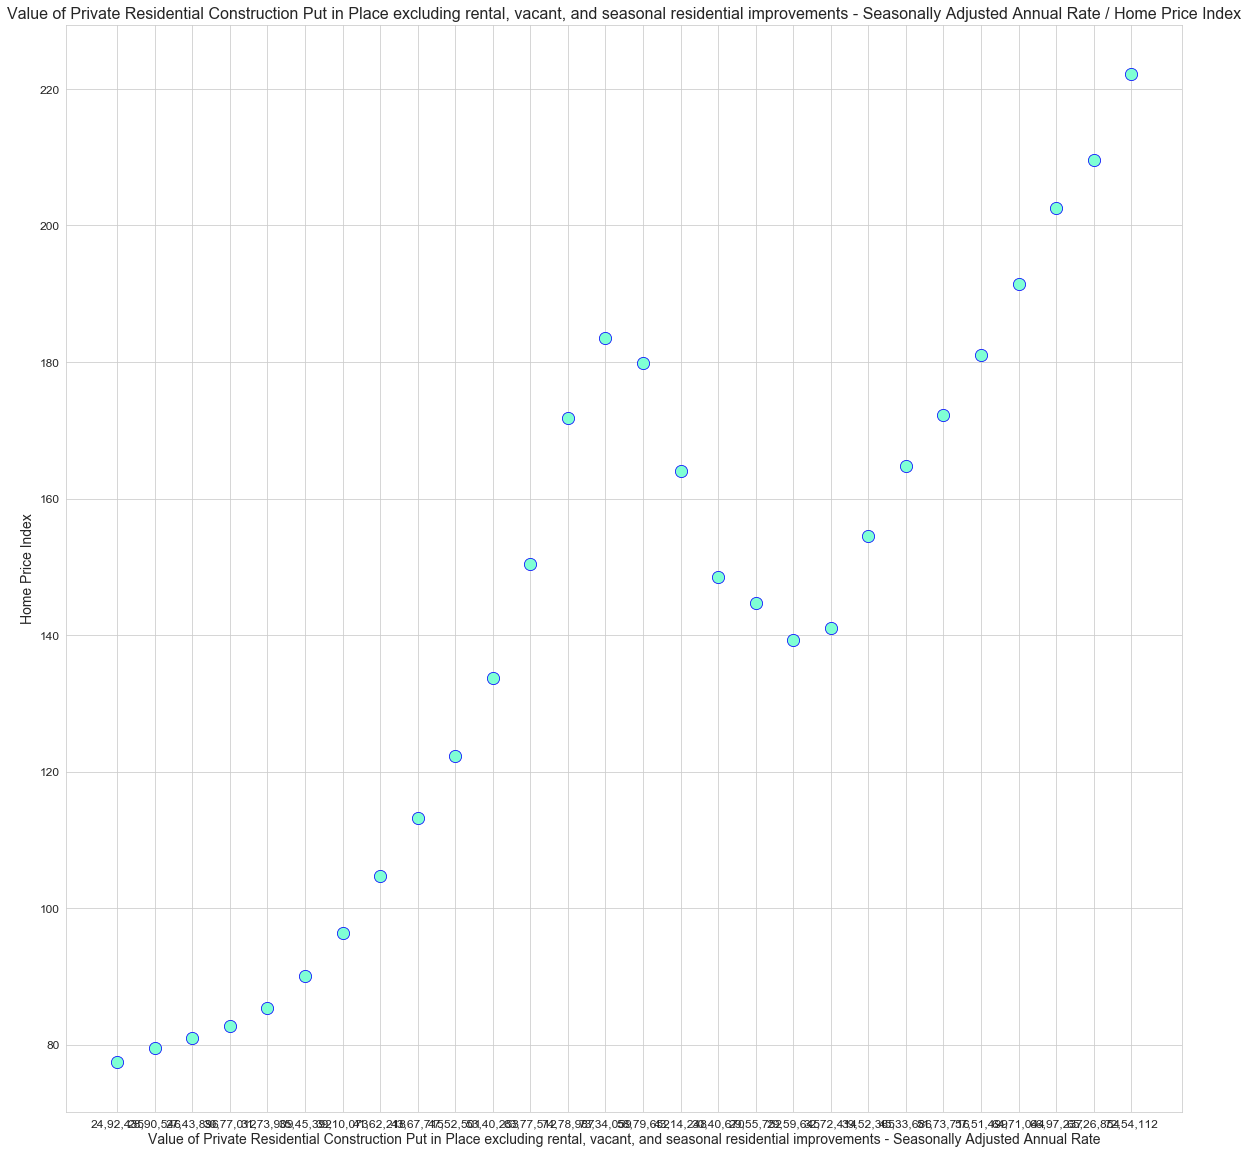

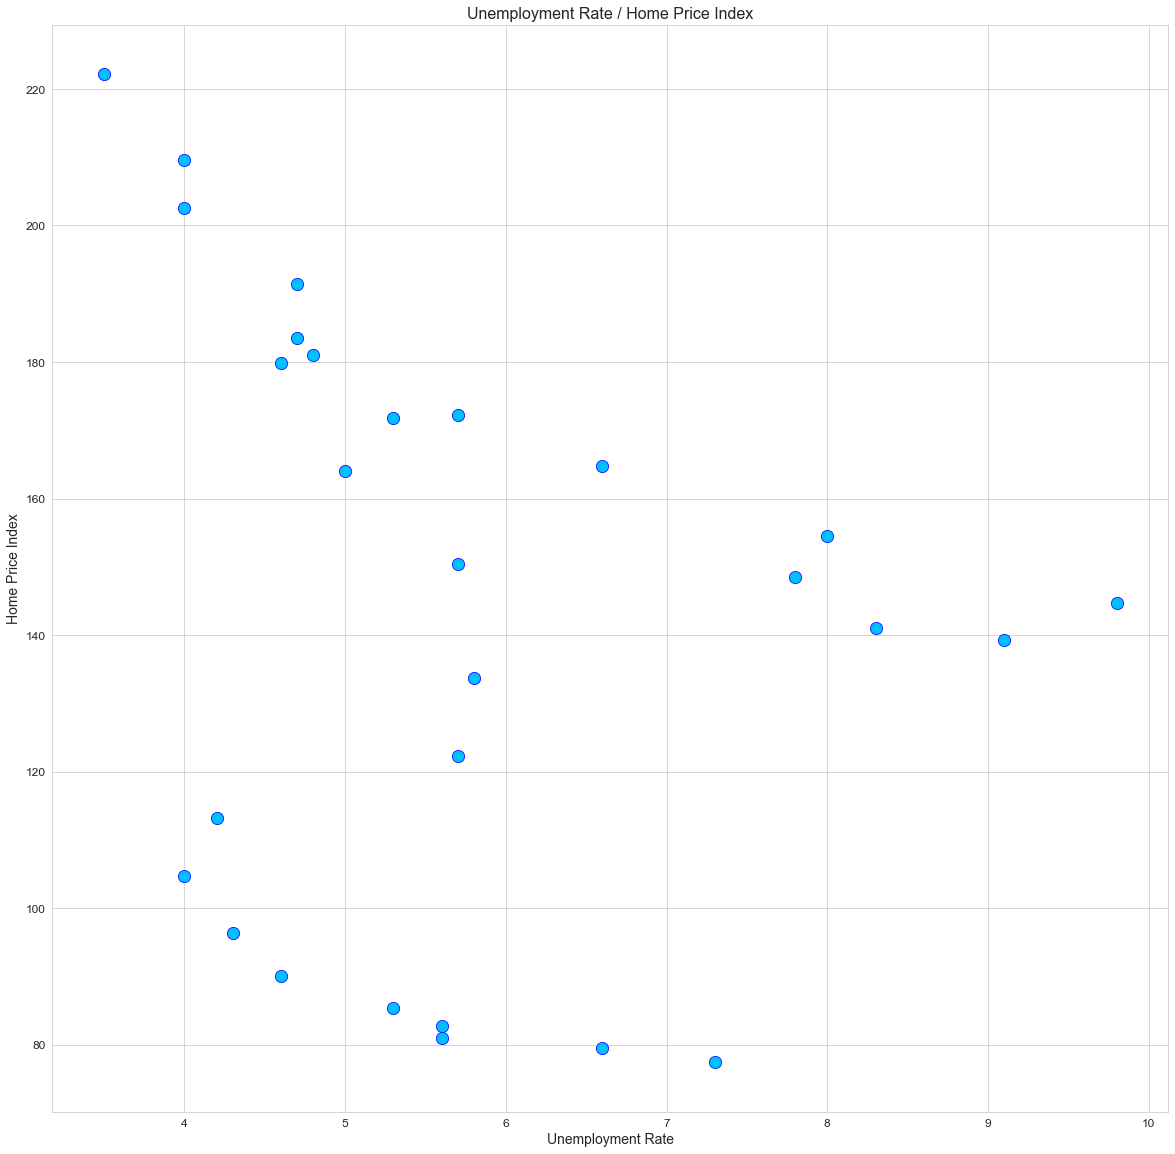

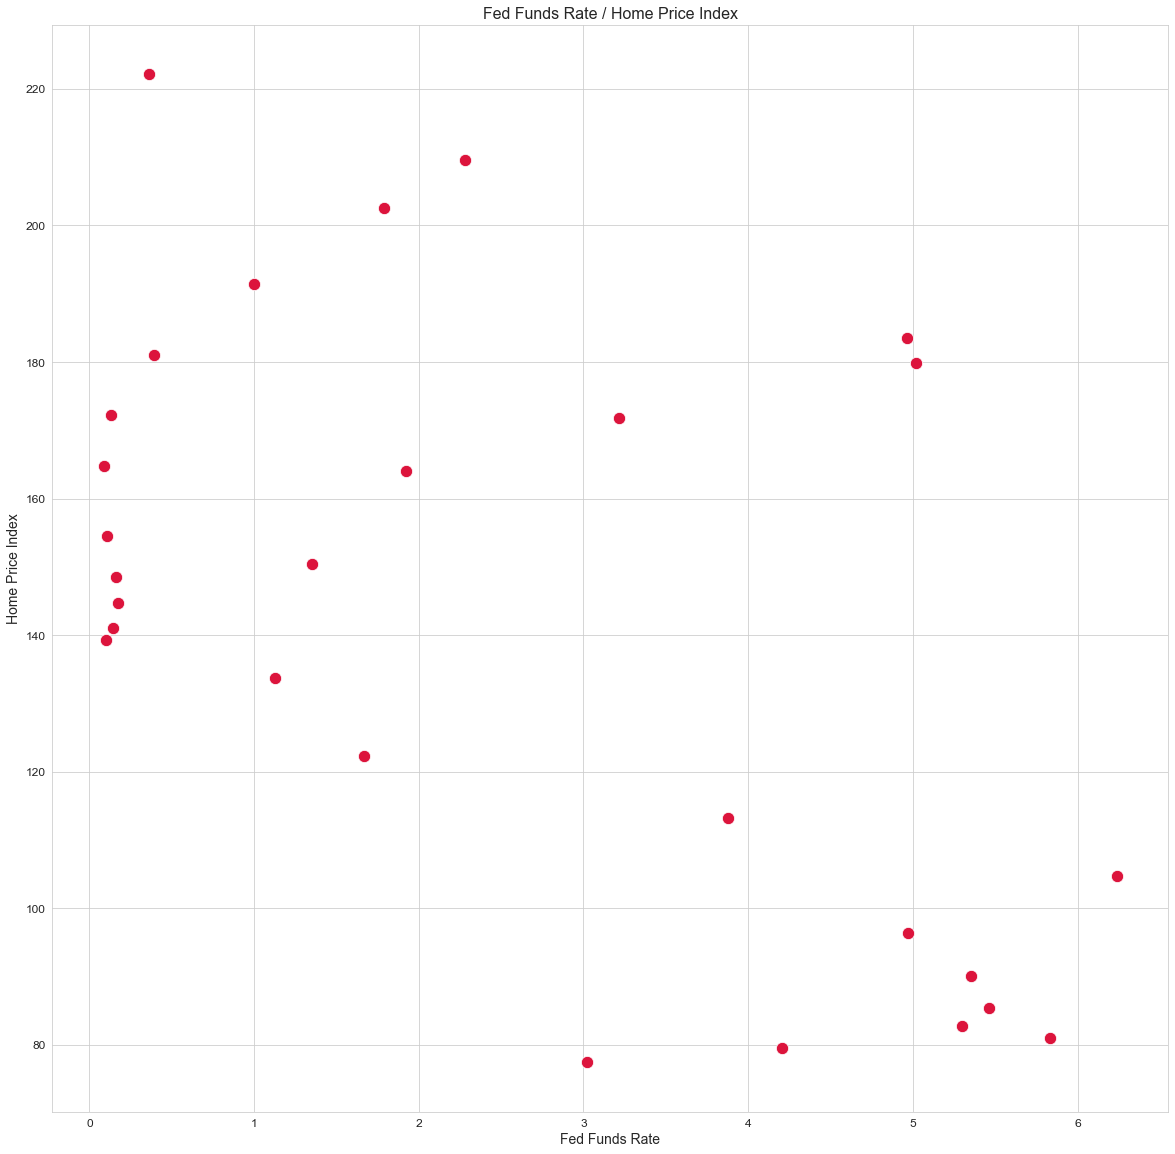

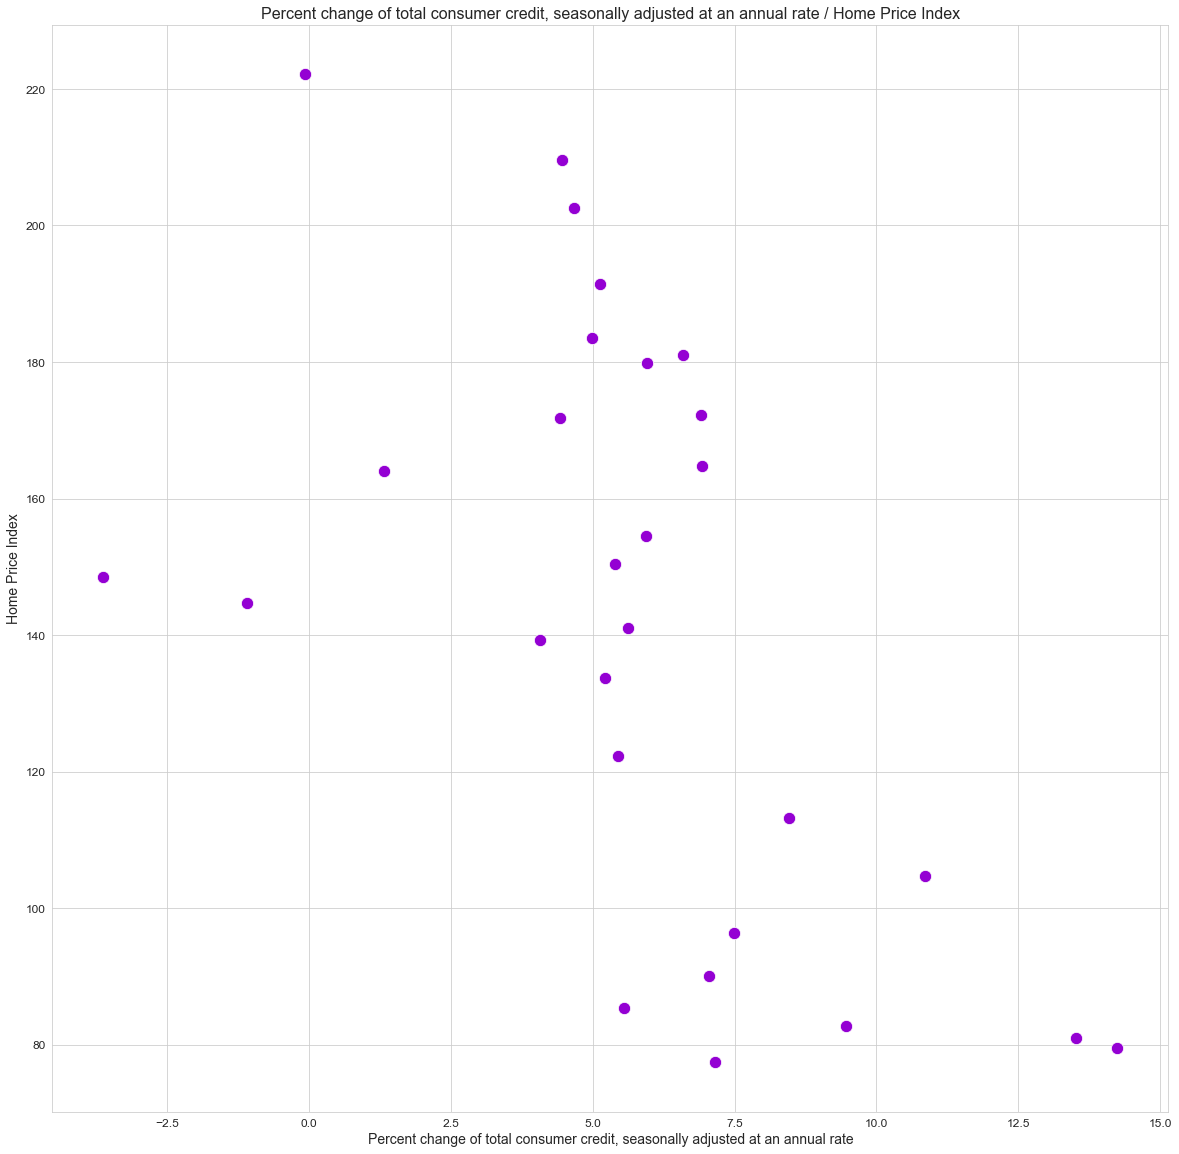

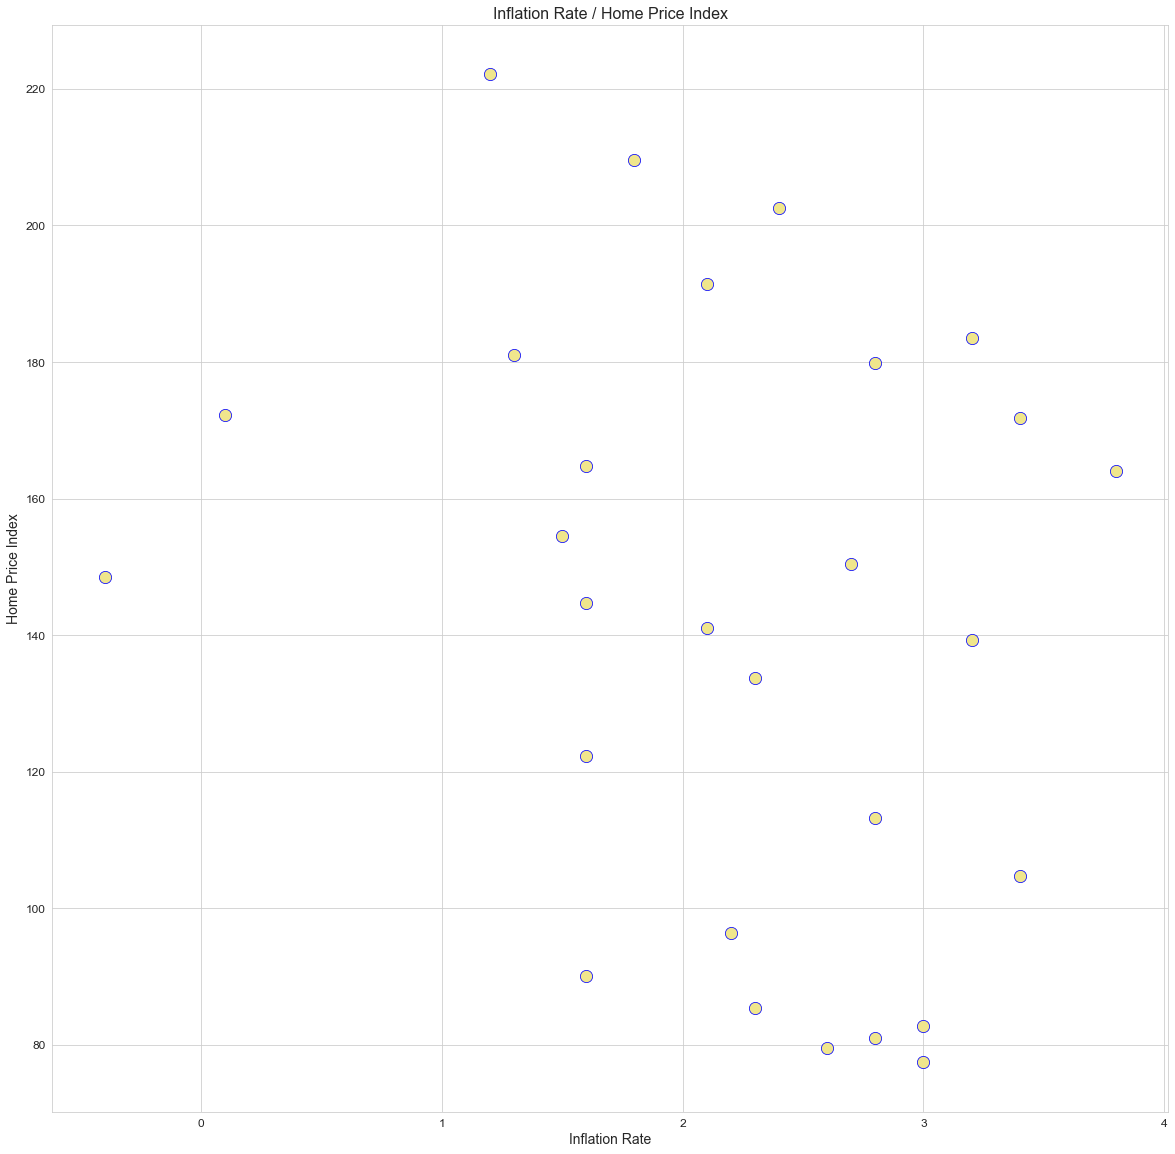

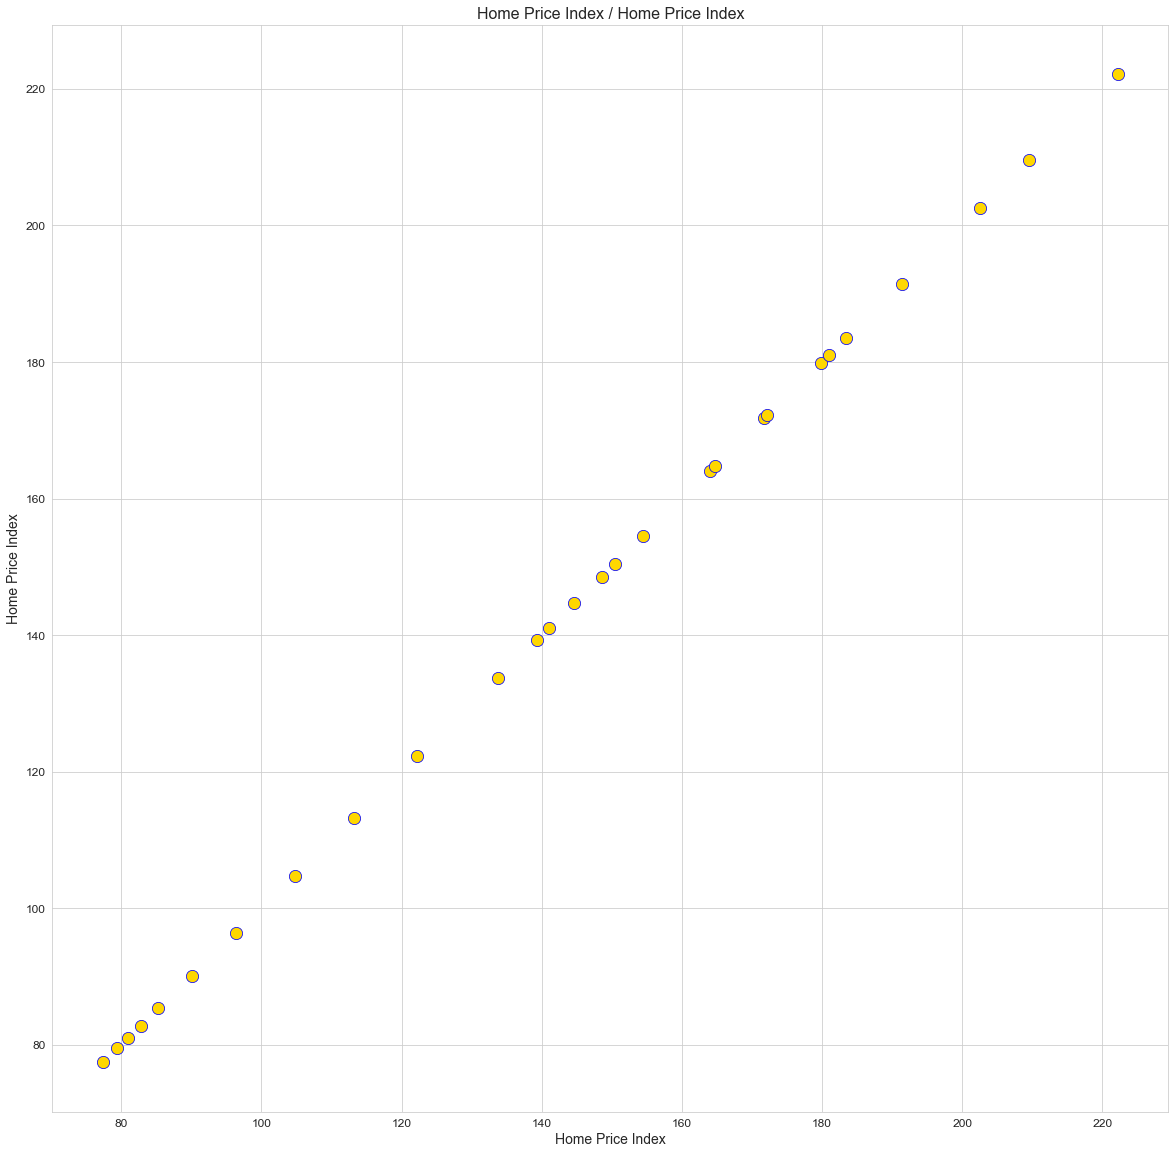

In [114]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
    plot3 = sb.scatterplot(i[2], y_var, data = df, color = 'aquamarine', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[2]), fontsize = 16)
    plt.xlabel('{}'.format(i[2]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter3.png')
    plt.show()
    
    plot4 = sb.scatterplot(i[3], y_var, data = df, color = 'deepskyblue', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter4.png')
    plt.show()
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} / Home Price Index'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    plot6 = sb.scatterplot(i[5], y_var, data = df, color = 'darkviolet', edgecolor = 'white', s = 150)
    plt.title('{} / Home Price Index'.format(i[5]), fontsize = 16)
    plt.xlabel('{}'.format(i[5]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter6.png')
    plt.show()
    
    plot7 = sb.scatterplot(i[6], y_var, data = df, color = 'khaki', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[6]), fontsize = 16)
    plt.xlabel('{}'.format(i[6]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter7.png')
    plt.show()
    
    plot8 = sb.scatterplot(i[7], y_var, data = df, color = 'gold', edgecolor = 'b', s = 150)
    plt.title('{} / Home Price Index'.format(i[7]), fontsize = 16)
    plt.xlabel('{}'.format(i[7]), fontsize = 14)
    plt.ylabel('Home Price Index', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter8.png')
    plt.show()
    
scatter_df('Home Price Index')

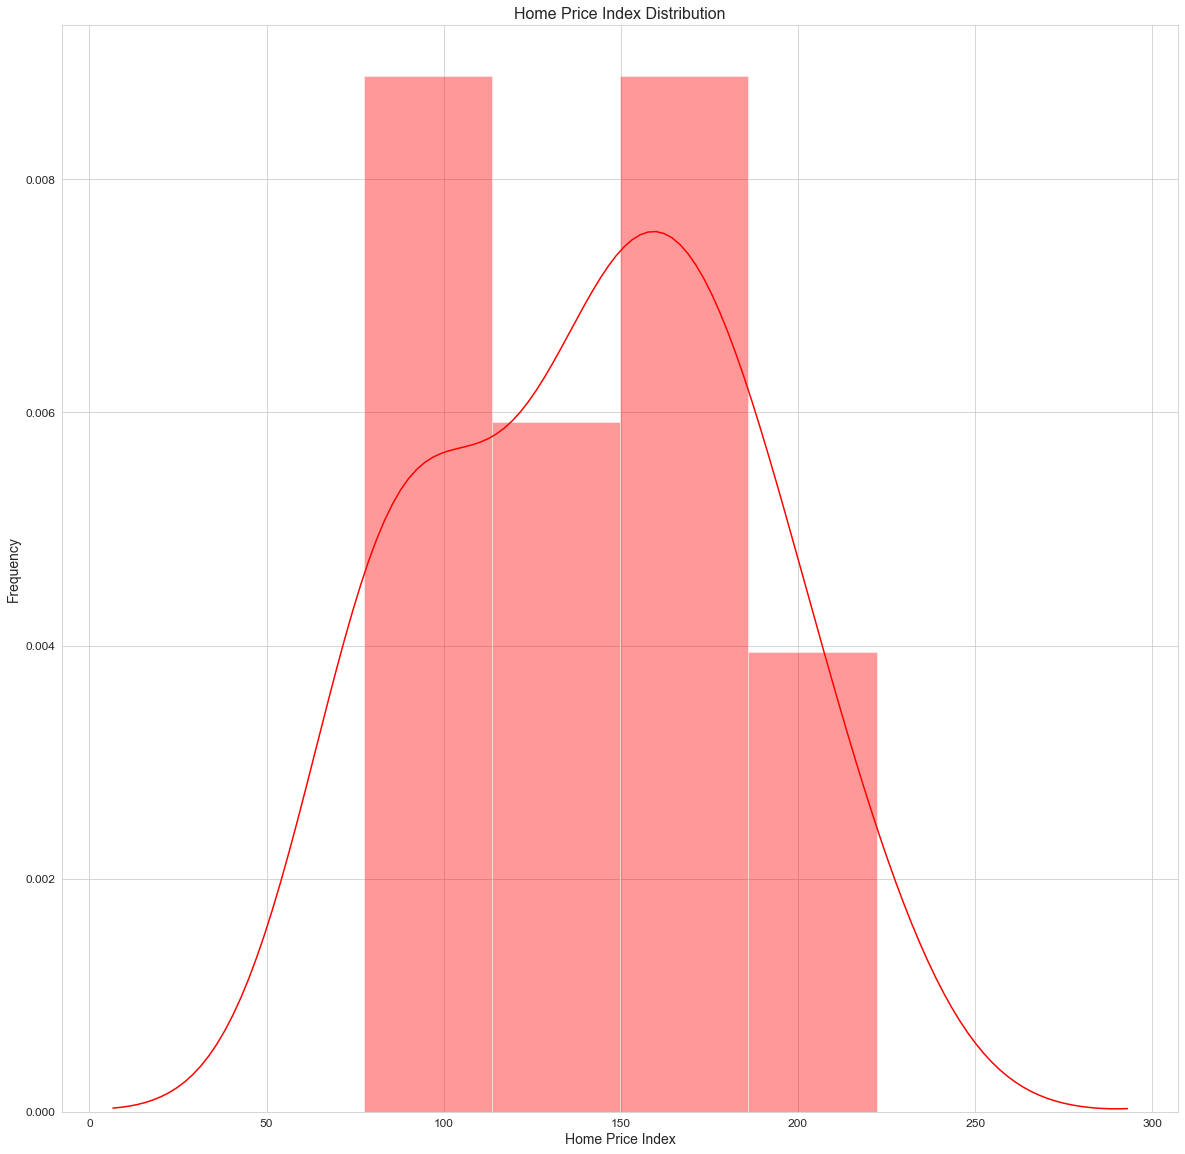

In [115]:
# 3. Distribution plot

sb.distplot(df['Home Price Index'], color = 'r')
plt.title('Home Price Index Distribution', fontsize = 16)
plt.xlabel('Home Price Index', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [136]:
# FEATURE SELECTION & DATA SPLIT

X_var = df[['Date', 'GDP per capita ', 'Value of Private Residential Construction Put in Place excluding rental, vacant, and seasonal residential improvements - Seasonally Adjusted Annual Rate', 'Unemployment Rate', 'Fed Funds Rate', 'Percent change of total consumer credit, seasonally adjusted at an annual rate', 'Inflation Rate', 'Residential Loan Delinquency Rates']].values
y_var = df['Home Price Index'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[ 2.01700000e+03  5.98950000e+04  6.47104400e+06  4.70000000e+00
   1.00137741e+00  5.12083333e+00  2.10000000e+00  3.70000000e+00]
 [ 2.00600000e+03  4.62140000e+04  7.33405900e+06  4.70000000e+00
   4.96542466e+00  4.99250000e+00  3.20000000e+00  1.70000000e+00]
 [ 2.01300000e+03  5.30610000e+04  3.95236500e+06  8.00000000e+00
   1.07342466e-01  5.93250000e+00  1.50000000e+00  9.10000000e+00]
 [ 2.01800000e+03  6.26060000e+04  6.69723700e+06  4.00000000e+00
   1.78959596e+00  4.66666667e+00  2.40000000e+00  3.15000000e+00]
 [ 2.00900000e+03  4.70080000e+04  3.04067000e+06  7.80000000e+00
   1.58602740e-01 -3.62833333e+00 -4.00000000e-01  9.00000000e+00]]
X_test samples :  [[ 1.99500000e+03  2.86710000e+04  2.74389600e+06  5.60000000e+00
   5.83430137e+00  1.35200000e+01  2.80000000e+00  2.12000000e+00]
 [ 2.01500000e+03  5.67700000e+04  5.17371600e+06  5.70000000e+00
   1.33726027e-01  6.91500000e+00  1.00000000e-01  5.70000000e+00]
 [ 2.00700000e+03  4.78690000e+

# Model Creation

In [144]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)


# 3. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)





Evaluating which model is the best


In [145]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))



EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.9594937655842414
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.9577247889470446
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.9382952414509067


In [146]:
#evaluating against r square value 
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.9529166514880254
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.9508541813402436
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.9318125497540272
-------------------------------------------------------------------------------
